In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
import string
from sklearn.metrics import accuracy_score



In [2]:
training_data=pd.read_csv("train.csv")
testing_data=pd.read_csv("test.csv")

In [3]:
print("First few rows of the training data:")
print(training_data.head())

First few rows of the training data:
             tweet_id airline_sentiment    airline airline_sentiment_gold  \
0  567900433542488064          negative  Southwest                    NaN   
1  569989168903819264          positive  Southwest                    NaN   
2  568089179520954368          positive     United                    NaN   
3  568928195581513728          negative  Southwest                    NaN   
4  568594180014014464          negative     United                    NaN   

            name negativereason_gold  retweet_count  \
0  ColeyGirouard                 NaN              0   
1  WalterFaddoul                 NaN              0   
2      LocalKyle                 NaN              0   
3    amccarthy19                 NaN              0   
4        J_Okayy                 NaN              0   

                                                text tweet_coord  \
0  @SouthwestAir I am scheduled for the morning, ...         NaN   
1  @SouthwestAir seeing your work

In [4]:
print("First few rows of the testing data:")
print(testing_data.head())

First few rows of the testing data:
             tweet_id     airline airline_sentiment_gold          name  \
0  569682010270101504    American                    NaN      zsalim03   
1  569608307184242688    American                    NaN      sa_craig   
2  567879304593408001   Southwest                    NaN  DanaChristos   
3  569757651539660801  US Airways                    NaN      rossj987   
4  569900705852608513    American                    NaN    tranpham18   

  negativereason_gold  retweet_count  \
0                 NaN              0   
1                 NaN              0   
2                 NaN              1   
3                 NaN              0   
4                 NaN              0   

                                                text tweet_coord  \
0  @AmericanAir In car gng to DFW. Pulled over 1h...         NaN   
1  @AmericanAir after all, the plane didn’t land ...         NaN   
2  @SouthwestAir can't believe how many paying cu...         NaN   
3  @US

In [5]:
print(training_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   tweet_id                10980 non-null  int64 
 1   airline_sentiment       10980 non-null  object
 2   airline                 10980 non-null  object
 3   airline_sentiment_gold  31 non-null     object
 4   name                    10980 non-null  object
 5   negativereason_gold     24 non-null     object
 6   retweet_count           10980 non-null  int64 
 7   text                    10980 non-null  object
 8   tweet_coord             776 non-null    object
 9   tweet_created           10980 non-null  object
 10  tweet_location          7430 non-null   object
 11  user_timezone           7403 non-null   object
dtypes: int64(2), object(10)
memory usage: 1.0+ MB
None


In [6]:
print(training_data.describe())

           tweet_id  retweet_count
count  1.098000e+04   10980.000000
mean   5.692169e+17       0.080965
std    7.795438e+14       0.740303
min    5.675883e+17       0.000000
25%    5.685584e+17       0.000000
50%    5.694753e+17       0.000000
75%    5.698902e+17       0.000000
max    5.703106e+17      44.000000


In [7]:
print(training_data['airline_sentiment'].value_counts())

airline_sentiment
negative    6851
neutral     2327
positive    1802
Name: count, dtype: int64


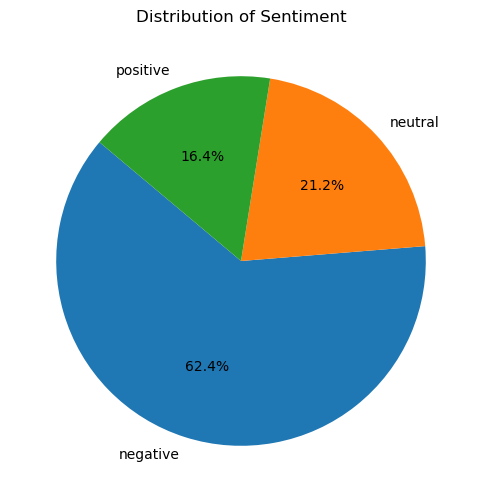

In [8]:
# Plot distribution of sentiment
sentiment_counts = training_data['airline_sentiment'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment')
plt.show()


In [9]:
# Data Cleaning & Data preprocessing

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join tokens back into text
    return ' '.join(tokens)


In [10]:
training_data['text'] = training_data['text'].apply(preprocess_text)
testing_data['text'] = testing_data['text'].apply(preprocess_text)


In [11]:

print(training_data['text'])

0        southwestair scheduled morning 2 day fact yesn...
1        southwestair seeing worker time time going bey...
2        united flew ord miami back great crew service ...
3              southwestair dultch97 thats horse radish 😤🐴
4        united flight ord delayed air force one last f...
                               ...                        
10975                               americanair followback
10976    united thanks help wish phone rep could accomi...
10977             usairways worst ever dca customerservice
10978         nrhodes85 look another apology fly usairways
10979    united far worst airline 4 plane delay 1 round...
Name: text, Length: 10980, dtype: object


In [12]:


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(training_data['text'], training_data['airline_sentiment'], test_size=0.2, random_state=42)



In [13]:
# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)


In [14]:
# Train the Random Forest classifier
clf = RandomForestClassifier(n_estimators=2000, n_jobs=-1)
clf.fit(X_train_tfidf, y_train)


RandomForestClassifier(n_estimators=2000, n_jobs=-1)

In [15]:
# Make predictions on the validation set
y_pred = clf.predict(X_val_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy on validation set:", accuracy)


Accuracy on validation set: 0.755464480874317


In [16]:
# Make predictions on the test set
X_test_tfidf = tfidf_vectorizer.transform(testing_data['text'])
y_test_pred = clf.predict(X_test_tfidf)



In [17]:
# Save predictions to a CSV file
testing_data['predicted_sentiment'] = y_test_pred
testing_data.to_csv('test_predictions.csv', index=False)


# lets try new approchs


In [23]:
from sklearn.svm import SVC


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(training_data['text'], training_data['airline_sentiment'], test_size=0.2, random_state=42)

# Feature extraction: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Model building: Support Vector Machine (SVM)
svm_clf = SVC(kernel='linear')  # Linear kernel for SVM

# Train the SVM classifier
svm_clf.fit(X_train_tfidf, y_train)

# Make predictions on the validation set
y_pred_svm = svm_clf.predict(X_val_tfidf)

# Evaluate the model on the validation set
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print("\nAccuracy on validation set with SVM:", accuracy_svm)


Accuracy on validation set with SVM: 0.7750455373406193


In [26]:
# Create a DataFrame with original text and predicted sentiment
results_df = pd.DataFrame({'Text': X_val[:len(y_pred_svm)], 'Predicted_Sentiment': y_pred_svm})

# Save the DataFrame to a CSV file
results_df.to_csv('svm_model_output.csv', index=False)


In [21]:
## nive base

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel


# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(training_data['text'], training_data['airline_sentiment'], test_size=0.2, random_state=42)

# Feature extraction: TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=0.001)

# Create a pipeline with feature selection and classification
pipeline = Pipeline([
    ('tfidf', tfidf_vectorizer),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100))),
    ('classifier', MultinomialNB())  # You can replace MultinomialNB with any classifier you want to use
])

# Train the classifier
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = pipeline.predict(X_val)

# Evaluate the model on the validation set
accuracy = accuracy_score(y_val, y_pred)
print("\nAccuracy on validation set with Sieve algorithm:", accuracy)


Accuracy on validation set with Sieve algorithm: 0.7071948998178507
